# Zadanie : Napisać algorytm spadku wzdłuż gradientu (prosta implementacja)

### Używane biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Funkcja i jej pochodna

In [3]:
def f(x: float, y: float) -> float:
  return np.sin(x) * np.cos(y) + np.sin(0.5 *x) * np.cos(0.5 * y)

def f_grad(x: float, y: float) -> tuple:
  dx = np.cos(x) * np.cos(y) + 0.5 * np.cos(0.5 * x) * np.cos(0.5 * y)
  dy = -np.sin(x) * np.sin(y) - 0.5 * np.sin(0.5 * x) * np.sin(0.5 * y)
  return dx, dy

In [5]:
x, y = 2, 2
print(f"x = {x}, y = {y}")
print(f"f(x,y) = {f(x,y)}")
print(f"f_grad(x,y) = {f_grad(x,y)}")

x = 2, y = 2
f(x,y) = 0.07624746575887675
f_grad(x,y) = (0.3191414804314085, -1.1808585195685917)


### Metoda spadku wzdłuż gradientu

In [ ]:
def make_step(x: float, y: float, learning_rate: float) -> tuple:
  dx, dy = f_grad(x, y)
  x -= learning_rate * dx
  y -= learning_rate * dy
  return x, y

def gradient_descent(x: float, y: float, learning_rate: float, epochs: int, verbose: bool=False) -> tuple:
    print(f"Initial point: x = {np.round(x,2)}, y = {np.round(y,2)}, f(x,y) = {np.round(f(x,y),2)}")

    records = []
    first_record = (x, y, f(x, y))
    records.append(first_record)

    for _ in range(epochs):
        new_x, new_y = make_step(x, y, learning_rate)

        x, y = new_x, new_y
        new_value = f(x, y)

        records.append((x, y, new_value))

        if verbose and _ % 10 == 0:
           print(f"Epoch {_}, x = {np.round(x,2)}, y = {np.round(y,2)}, f(x,y) = {np.round(f(x,y),2)}")

    print(f"Final point: x = {np.round(x,2)}, y = {np.round(y,2)}, f(x,y) = {np.round(f(x,y),2)}")
    return x, y, records


In [43]:
x, y = 2, 2
learning_rate = 0.1
epochs = 100

x, y, records = gradient_descent(x, y, learning_rate, epochs, verbose=True)

Initial point: x = 2, y = 2, f(x,y) = 0.08
Epoch 0, x = 1.97, y = 2.12, f(x,y) = -0.07
Epoch 10, x = 1.69, y = 2.99, f(x,y) = -0.93
Epoch 20, x = 1.62, y = 3.33, f(x,y) = -1.05
Epoch 30, x = 1.62, y = 3.44, f(x,y) = -1.06
Epoch 40, x = 1.63, y = 3.48, f(x,y) = -1.06
Epoch 50, x = 1.63, y = 3.5, f(x,y) = -1.06
Epoch 60, x = 1.63, y = 3.51, f(x,y) = -1.06
Epoch 70, x = 1.64, y = 3.51, f(x,y) = -1.06
Epoch 80, x = 1.64, y = 3.51, f(x,y) = -1.06
Epoch 90, x = 1.64, y = 3.51, f(x,y) = -1.06
Final point: x = 1.64, y = 3.51, f(x,y) = -1.06


In [35]:
def calculate_gradient_descent_and_plot_it(starting_x: float, starting_y: float, learning_rate:float, epochs: float, verbose=True):
    x, y, records = gradient_descent(starting_x, starting_y, learning_rate, epochs, verbose)

    # plotting results on contour
    X = np.linspace(-10, 10, 300)
    Y = np.linspace(-10, 10, 300)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, cmap='viridis', levels=20)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    x = [record[0] for record in records]
    y = [record[1] for record in records]
    ax.plot(x, y, marker='o', color='r')

    plt.show()


Initial point: x = 6.29, y = 2.7, f(x,y) = -0.0
Final point: x = 7.92, y = 2.77, f(x,y) = -1.06


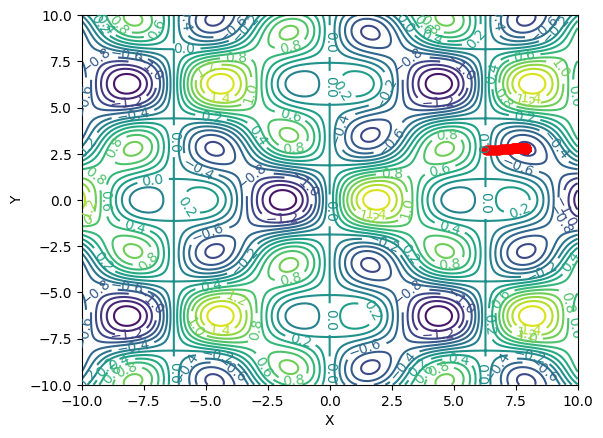






Initial point: x = 3.01, y = 8.93, f(x,y) = -0.36
Final point: x = 1.64, y = 9.06, f(x,y) = -1.06


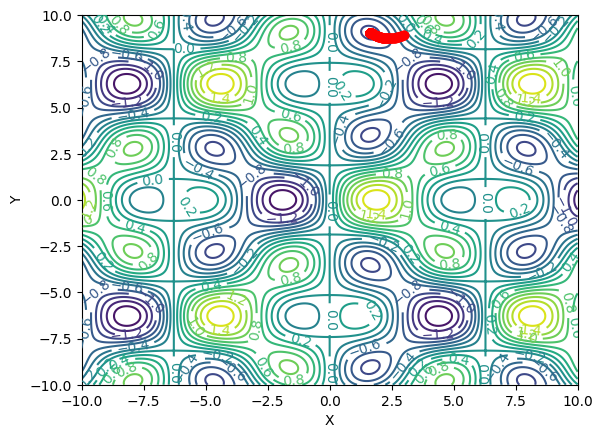






Initial point: x = 2.74, y = 4.4, f(x,y) = -0.7
Final point: x = 1.64, y = 3.51, f(x,y) = -1.06


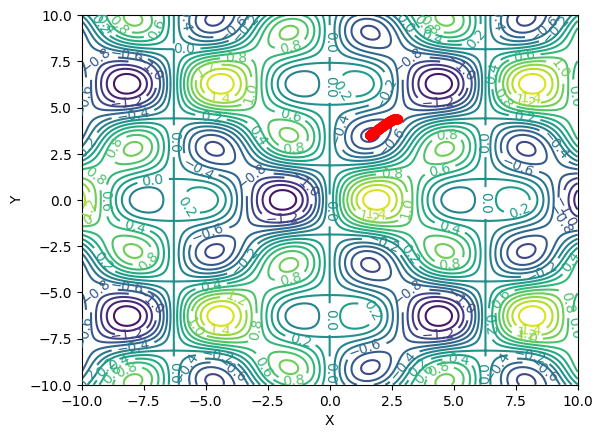






Initial point: x = 2.61, y = 6.66, f(x,y) = -0.48
Final point: x = 4.41, y = 6.28, f(x,y) = -1.76


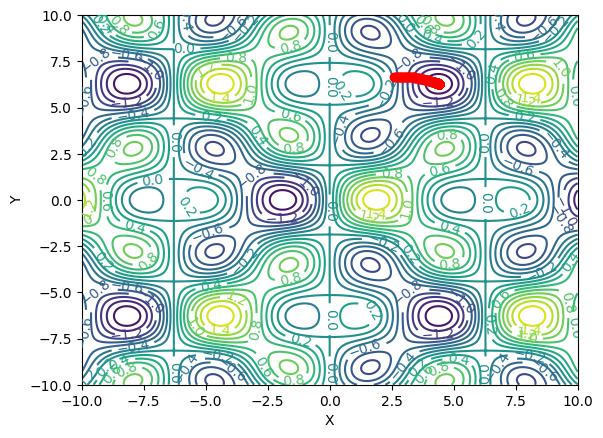






Initial point: x = 4.58, y = 9.79, f(x,y) = 1.06
Final point: x = 1.64, y = 9.06, f(x,y) = -1.06


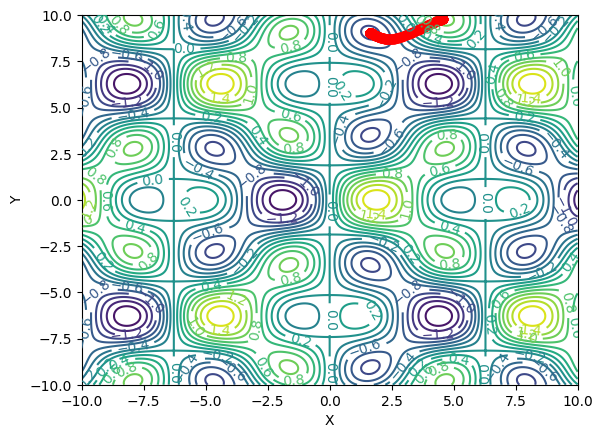






Initial point: x = 0.78, y = 0.64, f(x,y) = 0.93
Final point: x = -1.87, y = 0.0, f(x,y) = -1.76


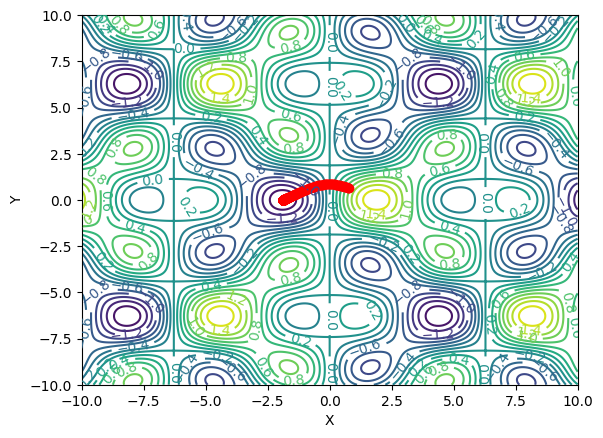






Initial point: x = 0.72, y = 5.44, f(x,y) = 0.12
Final point: x = 1.64, y = 3.51, f(x,y) = -1.06


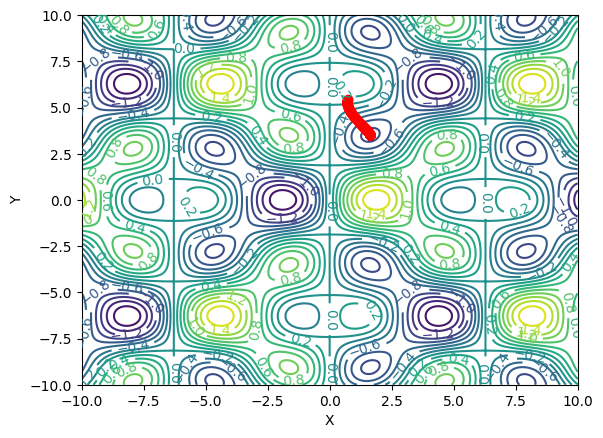






Initial point: x = 0.19, y = 9.34, f(x,y) = -0.19
Final point: x = 1.64, y = 9.06, f(x,y) = -1.06


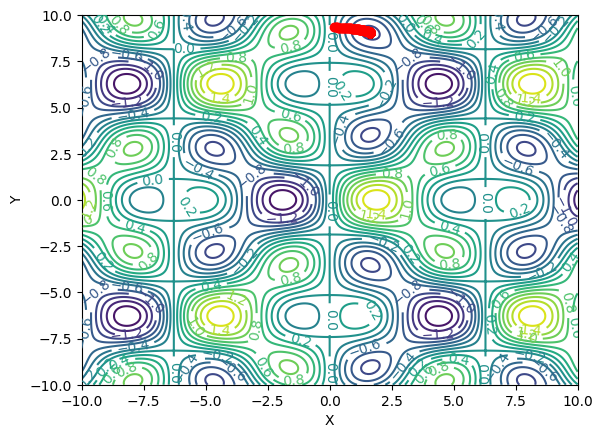






Initial point: x = 6.16, y = 5.05, f(x,y) = -0.09
Final point: x = 4.41, y = 6.28, f(x,y) = -1.76


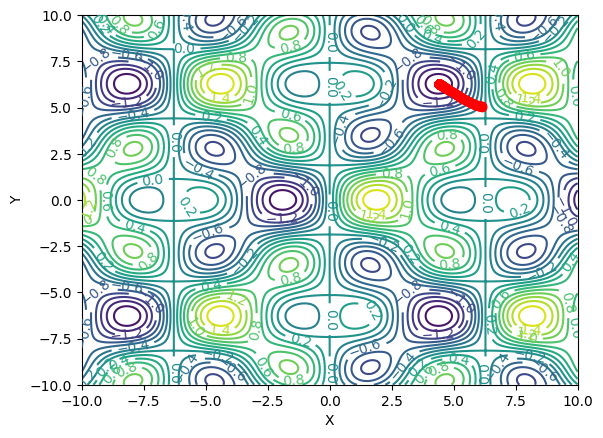






Initial point: x = 7.23, y = 3.45, f(x,y) = -0.7
Final point: x = 7.92, y = 2.77, f(x,y) = -1.06


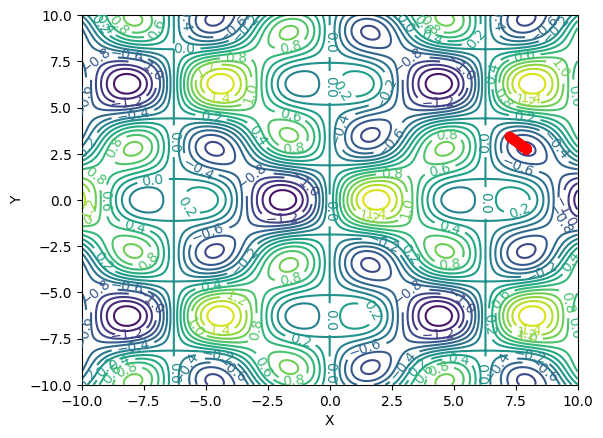

In [37]:
epochs = 1000
learning_rate = 0.03
tries = 10

for _ in range(tries):
    x, y = np.random.uniform(0, 10), np.random.uniform(0, 10)
    calculate_gradient_descent_and_plot_it(x, y, learning_rate, epochs, verbose=False)
    print("\n\n\n\n")